# Smith-Waterman genome application

We will apply the Smith-Waterman algorithm to two specific sequences. In this example, we align the NC_000017.11 human scaffold with the whole gorilla genome.

In [46]:
import pandas as pd
import time
import numpy as np
from datetime import datetime as dt
from ipynb.fs.full.smith_waterman import *

In [47]:
human = pd.read_excel('C:/Users/bertr/LRZ Sync+Share/Syntheny-Graph (Pirmin Schlicke)/Tables_Filtered_IK.xlsx', 'Human')
gorilla = pd.read_excel('C:/Users/bertr/LRZ Sync+Share/Syntheny-Graph (Pirmin Schlicke)/Tables_Filtered_IK.xlsx', 'Gorilla')

# 1 min 40 s approx

In [48]:
'''
# To load all of them at once and afterwards accessing one by one, this might be an option.
#https://towardsdatascience.com/a-simple-trick-to-load-multiple-excel-worksheets-in-pandas-3fae4124345b
# Define filepath
filepath = 'C:/Users/bertr/LRZ Sync+Share/Syntheny-Graph (Pirmin Schlicke)/Tables_Filtered_IK.xlsx'

# Load Excel file using Pandas with `sheet_name=None`
df_dict = pd.read_excel(filepath, sheet_name=None)

# Preview
df_dict

# Get a specific one
human = df_dict.get('Human')
'''

"\n#https://towardsdatascience.com/a-simple-trick-to-load-multiple-excel-worksheets-in-pandas-3fae4124345b\n# Define filepath\nfilepath = 'C:/Users/bertr/LRZ Sync+Share/Syntheny-Graph (Pirmin Schlicke)/Tables_Filtered_IK.xlsx'\n\n# Load Excel file using Pandas with `sheet_name=None`\ndf_dict = pd.read_excel(filepath, sheet_name=None)\n\n# Preview\ndf_dict\n\n# Get a specific one\nhuman = df_dict.get('Human')\n"

In [49]:
# Only consider the gene classes
human['Gene'] = human['Locus'].str.split('(\d+)').str[0]
human.reset_index(inplace= True) # creates a column which will refers to the row number of the original file, hence we can identify the position of the gene

gorilla['Gene'] = gorilla['Locus'].str.split('(\d+)').str[0]
gorilla.reset_index(inplace = True)

# Filter out the genes we are not interested in
human = human[human['Gene'].str.contains('LOC') == False]
gorilla = gorilla[gorilla['Gene'].str.contains('LOC') == False]

#human['Origin'] = 'Human'
#gorilla['Origin'] = 'Gorilla'

### Smith-Waterman  
Prepare a dataset to implement S-W algorithm. For doing so, we will try to implement a small one, comparing two random scaffolds from human and gorilla.

In [50]:
sw_human = human.loc[human['Replicon Accession'].str.contains('NC_000017.11'), ['index', 'Gene']]
#sw_human = human.loc[human['Replicon Accession'].str.contains('NC_000020.11'), ['Gene', '#Replicon Name', 'Replicon Accession']] # length: 611
#sw_gorilla_scaffold = gorilla.loc[gorilla['Replicon Accession'].str.contains('NC_018435.2'), ['Gene', '#Replicon Name', 'Replicon Accession']].reset_index()
#sw_gorilla_scaffold = gorilla.loc[gorilla['Replicon Accession'].str.contains('NC_018440.2'), 'Gene'] # length: 739
sw_gorilla = gorilla.loc[gorilla['Gene'].str.contains('LOC') == False, ['index', 'Gene']]
#sw_human.to_csv('C:/Users/bertr/LRZ Sync+Share/Thesis/Data/Intermidiate/sw_human.csv')
#sw_gorilla.to_csv('C:/Users/bertr/LRZ Sync+Share/Thesis/Data/Intermidiate/sw_gorilla.csv')

In [52]:
#if __name__ == "__main__":
'''
# Reading the two required fasta sequences
file_1_name, file_1 = fasta_reader("Sequence1.fasta")
file_2_name, file_2  = fasta_reader("Sequence2.fasta")

file_1 = sw_human['Gene'].array
file_1_name = 'human_NC_000020.11'
file_2 = sw_gorilla_scaffold['Gene'].array
file_2_name = 'gorilla'
# Executing the Smith Waterman local alignment algorithm
tic = time.perf_counter()
output_1, output_2 = smith_waterman(file_1, file_2)
toc = time.perf_counter()

print(file_1_name + ' length: ' + str(len(file_1)) + ' ' + output_1 + '\n' + file_2_name + ' length: ' + str(len(file_2)) + ' ' + output_2)
print(f"Computed in {toc - tic:0.4f} seconds")
print(f"Length of the common sequence: " + str(len(output_1)))
'''

#human_NC_000017.11 DCDCDCDC
#gorilla_NC_018435.2 DCDCDCDC
#Computed in 28.7334 seconds

# human_NC_000017.11 length: 1318  CODHPRCMAFSPVMAFNIMEGDOLGMRMNXNMMITRBAAHLHBCSUTEAHWYEAHWYKRCOYMPPNIANPTIPCLSFRACSPLIRFPRPDCLTRDWRDWFNIPRESFNIPRESDYMSAPRNTRHPDACVOCIHGMSGMSRRSRSTMSGSMSGSTNMLTTEMHAFAPHAFAPHULCCDCCPARROROROROROROROROROROATAPSAPSAVPRTVPRTKPHSSNTCSNTCXATCMEPEAGTIGSGEAGTIPBCNPBCNKKMACKKMACKKMACPPPTAPTAFEZZFEZZBYCYFKNAEBUSNPSSNPSPBBYMTGGLNTMSXOLAPLEPBRRADEMLCXCDNYMZMTOMVDPTLGBMSPDLPKNIMENRHCCPGCLSFNRNFPONEGAPSATMACACNIFIKCLSPFZFNZPSUFNZPMICSPEBARPUNNIAPRCXHDLREDSIMPRLNDCSWLPIAMAFMAFMNPTIPAAIKAAIKCDNXTDEMDEMCCLSFAXFAXOXBFTKETXOLAKESANRCLCBCLSCLSCELCRGSARGSAGLDLVDACALVDFHPPARABAGPENDTCPLENDLCCLSXBYFIEFIESPGLRUENPACADTCKMEMTMEMTKNTKNTRCSLPMEMTNGLNMEPSCMEMTFGFBNRHCBTBZCLSRLOPFSFNTFSFNTPNESFIEDCUDPMUDPMXOSRXFTASTASGBHSPTAPTPTPTPARWBNFEHANDMDKMEMTAANBYCDHCDHCDHCDHCBANCKCPPARTBORTNC-YCUGXOLAXOLAEXOLAEXOLASEHREPPMAVMEMTSCROBBKRUACTCSAFPSAFPFRGNARCLSFEGHRAFDOABRKLPRFNRLEDNLEDNHYMCDCCEYDPSDSFMKIPKIPKIPNTNXTSPAFCPSUSRHDGSGPLGNRVCRSAGHYMHYMHYMHYMHYMHYMOCSMRPDAMEMTTRIPASIHSHANDHANDFNZPAMPAMDCOYMPAGHRA-CALESHXOCTRDCSHPMPTKETTKETTRDC
# gorilla            length: 17433 CODHPRCBNLFRSPVMAFNIMEGDOLGMRMNXNMMITRBAAHLHBCSUTEAHWY-KRCOYMPPNIANPTIPCLSFRACSPLIRFPRPDCLTRDW-FNIPRESFNIPRESDYMSAPRNTRHPDACVOCIHGMS-RRSRSTMSGSMSGSTNMLTTEMHAFAP-HULC-PAR----------ATAPSAPSAVPRTVPRTKPHSSNTC-XATCMEPEAGTIGSG-PBCN-KKMAC--P-PTA-FEZZ--YFKNAEBUSNPSSNPSPBBYMTGGLNTMSXOLAPLEPBRRADEMLCXCDNYMZMTOMVDPTLGBMSPDLPKNIMENRHCCPGCLSFNRNFPONEGAPSATMACACNIFIKCLSPFZFNZ-FNZPMICSPEBARPUNNIAPRCXHDLREDSIMPRLNDCSWLPIALPIAMAFMNPTIPAAIK-CDNXTDEM-CCLSFAX-OXBFTKETXOLAKESANRCLCBCLSCLS-RGSARGSAGLDLVDACALVDFHPPARABAGPENDTCPLENDLCCLSXBYFIE-SPGLRUENPACADTCK--KNT-RCSLPMEMTNGLNMEPSCMEMTFGFBNRHCBTBZ-RLOPFSFNTFSFNTPNESFIEDCUDPM-XOSRXFTAS-GBHSPTAPT--PARWBNFEHANDMDKMEMTAAN-DHCDHCDHCBANCKBANCKCPPARTBORTNCBORTNCYCUGXOLAXOLAEXOLA-SEHREPPMAVMEMTSCROBBKRUACTCSAFP-FRGNARCLSFEGHRAFDOABRKLPRFNRLEDN-HYMCDCCEYDPSDSFMKIPKIP--XTSPAFCPSUSRHDGSGPLGNRVCRSAGHYMHYM-----MRPDAMEMTTRIPASIHSHAND-FNZPAM-DCOYMPAGHRAPAGHRACALESH-TRDCSHPMPTKET-TRDC
# Computed in 471.4808 seconds

# Print where is ubicated, separate genes, length of the common chain, not only one unique common gene, identify the differences

'\n# Reading the two required fasta sequences\nfile_1_name, file_1 = fasta_reader("Sequence1.fasta")\nfile_2_name, file_2  = fasta_reader("Sequence2.fasta")\n\nfile_1 = sw_human[\'Gene\'].array\nfile_1_name = \'human_NC_000020.11\'\nfile_2 = sw_gorilla_scaffold[\'Gene\'].array\nfile_2_name = \'gorilla\'\n# Executing the Smith Waterman local alignment algorithm\ntic = time.perf_counter()\noutput_1, output_2 = smith_waterman(file_1, file_2)\ntoc = time.perf_counter()\n\nprint(file_1_name + \' length: \' + str(len(file_1)) + \' \' + output_1 + \'\n\' + file_2_name + \' length: \' + str(len(file_2)) + \' \' + output_2)\nprint(f"Computed in {toc - tic:0.4f} seconds")\nprint(f"Length of the common sequence: " + str(len(output_1)))\n'

In [53]:
#sw_human.to_csv('S_W_Intermediate/sw_human.csv')
#sw_gorilla.to_csv('S_W_Intermediate/sw_gorilla.csv')

In [54]:
# Assigning the constants for the scores
class Score(IntEnum):
    MATCH = 1
    MISMATCH = -1
    GAP = -1

# Assigning the constant values for the traceback
class Trace(IntEnum):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

In [55]:
'''
OLD VERSION

seq1 = sw_human['Gene'].array
seq2 = sw_gorilla_scaffold['Gene'].array

row = len(seq1) + 1
col = len(seq2) + 1
matrix = np.zeros(shape=(row, col), dtype= int)  
tracing_matrix = np.zeros(shape=(row, col), dtype= int)  

# Initialising the variables to find the highest scoring cell
max_score = -1
max_index = (-1, -1)

# Calculating the scores for all cells in the matrix

for i in range(1, row):
    for j in range(1, col):
        # Calculating the diagonal score (match score)
        match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
        diagonal_score = matrix[i - 1, j - 1] + match_value
        
        # Calculating the vertical gap score
        vertical_score = matrix[i - 1, j] + Score.GAP
        
        # Calculating the horizontal gap score
        horizontal_score = matrix[i, j - 1] + Score.GAP
        
        # Taking the highest score 
        matrix[i, j] = max(0, diagonal_score, vertical_score, horizontal_score)
        
        # Tracking where the cell's value is coming from    
        if matrix[i, j] == 0: 
            tracing_matrix[i, j] = Trace.STOP
            
        elif matrix[i, j] == horizontal_score: 
            tracing_matrix[i, j] = Trace.LEFT
            
        elif matrix[i, j] == vertical_score: 
            tracing_matrix[i, j] = Trace.UP
            
        elif matrix[i, j] == diagonal_score: 
            tracing_matrix[i, j] = Trace.DIAGONAL 
            
        # Tracking the cell with the maximum score
        #If we want different strings, here we can define a threshold and keep track of all the higher values
        if matrix[i, j] >= max_score:
            max_index = (i,j)
            max_score = matrix[i, j]


# Initialising the variables for tracing
aligned_seq1 = [[ ]] #""
aligned_seq2 = [[ ]] #""   
current_aligned_seq1 = [ ] #""   
current_aligned_seq2 = [ ] #"" ´
current_index_seq1 = [ ]
current_index_seq2 = [ ]
index_seq1 = [ ]
index_seq2 = [ ]
(max_i, max_j) = max_index

# Tracing and computing the pathway with the local alignment
while tracing_matrix[max_i, max_j] != Trace.STOP:
    if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
        current_aligned_seq1.append(seq1[max_i - 1])
        current_aligned_seq2.append(seq2[max_j - 1])
        current_index_seq1.append(max_i)
        current_index_seq2.append(max_j)
        max_i = max_i - 1
        max_j = max_j - 1
        
    elif tracing_matrix[max_i, max_j] == Trace.UP:
        current_aligned_seq1.append(seq1[max_i - 1])
        current_aligned_seq2.append('-')
        current_index_seq1.append(max_i)
        current_index_seq2.append('-')
        max_i = max_i - 1    
        
    elif tracing_matrix[max_i, max_j] == Trace.LEFT:
        current_aligned_seq1.append('-')
        current_aligned_seq2.append(seq2[max_j - 1])
        current_index_seq1.append('-')
        current_index_seq2.append(max_j)
        max_j = max_j - 1
        
    aligned_seq1 = aligned_seq1 + current_aligned_seq1
    aligned_seq2 = aligned_seq2 + current_aligned_seq2
    index_seq1 += current_index_seq1 
    index_seq2 += current_index_seq2


# Reversing the order of the sequences
aligned_seq1 = aligned_seq1[::-1] , index_seq1[::-1]
aligned_seq2 = aligned_seq2[::-1], index_seq2[::-1]
        
'''

'\nOLD VERSION\n\nseq1 = sw_human[\'Gene\'].array\nseq2 = sw_gorilla_scaffold[\'Gene\'].array\n\nrow = len(seq1) + 1\ncol = len(seq2) + 1\nmatrix = np.zeros(shape=(row, col), dtype= int)  \ntracing_matrix = np.zeros(shape=(row, col), dtype= int)  \n\n# Initialising the variables to find the highest scoring cell\nmax_score = -1\nmax_index = (-1, -1)\n\n# Calculating the scores for all cells in the matrix\n\nfor i in range(1, row):\n    for j in range(1, col):\n        # Calculating the diagonal score (match score)\n        match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH\n        diagonal_score = matrix[i - 1, j - 1] + match_value\n        \n        # Calculating the vertical gap score\n        vertical_score = matrix[i - 1, j] + Score.GAP\n        \n        # Calculating the horizontal gap score\n        horizontal_score = matrix[i, j - 1] + Score.GAP\n        \n        # Taking the highest score \n        matrix[i, j] = max(0, diagonal_score, vertical_score,

Modification of S-W to keep indexes

In [56]:
#Modification of S-W to compute it directly in a dataframe with all the indexes; not just an array of genes

tic = time.perf_counter()

seq1 = sw_human     # 0: index ; 1: Gene
seq2 = sw_gorilla

row = len(seq1) + 1
col = len(seq2) + 1
matrix = np.zeros(shape=(row, col), dtype= int)  
tracing_matrix = np.zeros(shape=(row, col), dtype= int)  

# Initialising the variables to find the highest scoring cell
max_score = -1
max_index = (-1, -1)

# Calculating the scores for all cells in the matrix

for i in range(1, row):
    for j in range(1, col):
        # Calculating the diagonal score (match score)
        match_value = Score.MATCH if seq1.iloc[i - 1, 1] == seq2.iloc[j - 1, 1] else Score.MISMATCH
        diagonal_score = matrix[i - 1, j - 1] + match_value
        
        # Calculating the vertical gap score
        vertical_score = matrix[i - 1, j] + Score.GAP
        
        # Calculating the horizontal gap score
        horizontal_score = matrix[i, j - 1] + Score.GAP
        
        # Taking the highest score 
        matrix[i, j] = max(0, diagonal_score, vertical_score, horizontal_score)
        
        # Tracking where the cell's value is coming from    
        if matrix[i, j] == 0: 
            tracing_matrix[i, j] = Trace.STOP
            
        elif matrix[i, j] == horizontal_score: 
            tracing_matrix[i, j] = Trace.LEFT
            
        elif matrix[i, j] == vertical_score: 
            tracing_matrix[i, j] = Trace.UP
            
        elif matrix[i, j] == diagonal_score: 
            tracing_matrix[i, j] = Trace.DIAGONAL 
            
        # Tracking the cell with the maximum score
        #If we want different strings, here we can define a threshold and keep track of all the higher values
        if matrix[i, j] >= max_score:
            max_index = (i,j)
            max_score = matrix[i, j]


# Initialising the variables for tracing
aligned_seq1 = [[ ]] #""
aligned_seq2 = [[ ]] #""   
current_aligned_seq1 = [ ] #""   
current_aligned_seq2 = [ ] #"" ´
current_index_seq1 = [ ]
current_index_seq2 = [ ]
index_seq1 = [ ]
index_seq2 = [ ]
(max_i, max_j) = max_index

# Tracing and computing the pathway with the local alignment
while tracing_matrix[max_i, max_j] != Trace.STOP:
    if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
        current_aligned_seq1.append(seq1.iloc[max_i - 1, 1])
        current_aligned_seq2.append(seq2.iloc[max_j - 1, 1])
        current_index_seq1.append(seq1.iloc[max_i - 1, 0])
        current_index_seq2.append(seq2.iloc[max_j - 1, 0])
        max_i = max_i - 1
        max_j = max_j - 1
        
    elif tracing_matrix[max_i, max_j] == Trace.UP:
        current_aligned_seq1.append(seq1.iloc[max_i - 1, 1])
        current_aligned_seq2.append('-')
        current_index_seq1.append(seq1.iloc[max_i - 1, 0])
        current_index_seq2.append('-')
        max_i = max_i - 1    
        
    elif tracing_matrix[max_i, max_j] == Trace.LEFT:
        current_aligned_seq1.append('-')
        current_aligned_seq2.append(seq2.iloc[max_j - 1, 1])
        current_index_seq1.append('-')
        current_index_seq2.append(seq2.iloc[max_j - 1, 0])
        max_j = max_j - 1
    
    # Is this needed? Ask
    #aligned_seq1 = aligned_seq1 + current_aligned_seq1
    #aligned_seq2 = aligned_seq2 + current_aligned_seq2
    #index_seq1 += current_index_seq1 
    #index_seq2 += current_index_seq2


# Reversing the order of the sequences
#aligned_seq1 = aligned_seq1[::-1] , index_seq1[::-1]
#aligned_seq2 = aligned_seq2[::-1], index_seq2[::-1]

toc = time.perf_counter()

In [57]:
print(f"Computed in {toc - tic:0.4f} seconds")

Computed in 1731.1633 seconds


Idea: Once we have it in array format, we can make computations regarding the % of similarity

In [58]:
align_seq1 = pd.DataFrame({'Original Position' : current_index_seq1[::-1], 'Gene': current_aligned_seq1[::-1]}).merge(human[['index', '#Replicon Name', 'Replicon Accession']], left_on = 'Original Position', right_on = 'index', how = 'left')
align_seq2 = pd.DataFrame({'Original Position' : current_index_seq2[::-1], 'Gene': current_aligned_seq2[::-1]}).merge(gorilla[['index', '#Replicon Name', 'Replicon Accession']], left_on = 'Original Position', right_on = 'index', how = 'left')

align_seq1.rename(columns={'Original Position': 'Human Original Position', 'Gene' : 'Human Gene', '#Replicon Name': 'Human Replicon Name', 'Replicon Accession' : 'Human Replicon Accession'}, inplace = True)
align_seq2.rename(columns={'Original Position': 'Gorilla Original Position', 'Gene' : 'Gorilla Gene', '#Replicon Name': 'Gorilla Replicon Name', 'Replicon Accession' : 'Gorilla Replicon Accession'}, inplace = True)
all = align_seq1.loc[:, align_seq1.columns != 'index'].merge(align_seq2.loc[:, align_seq2.columns != 'index'], right_index = True, left_index = True)
all = all.reindex(
    columns = ['Human Original Position', 'Human Replicon Name',
    'Human Replicon Accession', 'Human Gene', 'Gorilla Gene', 'Gorilla Original Position',
    'Gorilla Replicon Name', 'Gorilla Replicon Accession'])

writer = pd.ExcelWriter('S_W_Intermediate/output_current_{}.xlsx'.format(dt.now().strftime('%Y%m%d_%H%M%S')))
all.to_excel(writer)
#align_seq1.to_excel(writer, sheet_name = 'human_NC_000017.11')
#align_seq2.to_excel(writer, sheet_name = 'gorilla')
writer.save()

In [59]:
'''
writer = pd.ExcelWriter('S_W_Results/output_{}.xlsx'.format(dt.now().strftime('%Y%m%d_%H%M%S')))
pd.DataFrame(aligned_seq1).to_excel(writer, sheet_name = file_1_name, index = False, header = False)
pd.DataFrame(aligned_seq2).to_excel(writer, sheet_name = file_2_name, index = False, header = False)
writer.save()
'''

"\nwriter = pd.ExcelWriter('S_W_Results/output_{}.xlsx'.format(dt.now().strftime('%Y%m%d_%H%M%S')))\npd.DataFrame(aligned_seq1).to_excel(writer, sheet_name = file_1_name, index = False, header = False)\npd.DataFrame(aligned_seq2).to_excel(writer, sheet_name = file_2_name, index = False, header = False)\nwriter.save()\n"

Analyse the S-W matrix to see if there exist other alingments, in this case (human NC_000017.11 scaffold vs gorilla)

In [72]:
matrix.tofile('S_W_Intermediate/matrix.csv', sep = ',')

Matrix to big to analyse element wise -> alternative, create a heatmap to see if there exist other regions where there are matches, i.e., exist positive values

<AxesSubplot:>

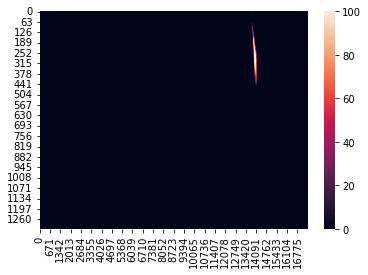

In [85]:
import seaborn as sns
sns.heatmap(matrix, vmax = 100)

In [77]:
np.count_nonzero(matrix)

134623

In [83]:
np.shape(matrix)

(1319, 17434)

In [84]:
17434*1319

22995446